## Predict waist circumfrance in cm, w/ some DTI RSI measures

In [1]:
from BPt import BPt_ML
import pandas as pd
import os

In [2]:
main_dr = '/home/sage/work/'

# Base data directories, 2.0 release with most of the phenotype information
nda_dr = main_dr + 'ABCD2p0NDA/'

# This folder contains the re-released 2.0.1 fixed MRI derived measurements
nda_dr2 = main_dr + 'ABCDFixRelease2p0p1/'

#This file stores the name mapping
map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

# Target loc
target_loc = nda_dr + 'abcd_ant01.txt'

# Data loc
data_loc1 = nda_dr2 + 'mri_rsi_p102.txt'
data_loc2 = nda_dr2 + 'mri_rsi_p202.txt'

# Strat loc
strat1 = os.path.join(nda_dr, 'acspsw03.txt')

In [3]:
ML = BPt_ML(exp_name = 'Waist_Circ',
            log_dr = None,
            random_state = 1)

ML.Set_Default_Load_Params(dataset_type = 'basic',
                           eventname = 'baseline_year_1_arm_1')

exp_name = Waist_Circ
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 1
n_jobs = 1
dpi = 100
mp_context = loky
BPt_ML object initialized
Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: baseline_year_1_arm_1
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: ['777', '999']
drop_na: True
drop_or_na: drop



## Load waist size + filter by some obvious outliers

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


cleared targets.

Loading /home/sage/work/ABCD2p0NDA/abcd_ant01.txt  with dataset type: basic
4951 data points have been dropped based on the passed eventname params.
Dropped 0 cols for all missing values
Dropped 17 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: anthro_waist_cm
Filtering for outliers by stds: (3, 4)
Min-Max value (pre-filter): 0.0 90.0
Min-Max value (post outlier filtering): 15.0 45.5

Dropped 50 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Loaded Shape: (11808, 1)
All loaded targets
0 : anthro_waist_cm

Set to overlapping loaded subjects.
-- anthro_waist_cm --


,anthro_waist_cm
count,11808.000
mean,26.454
std,4.199
min,15.000
25%,23.500
50%,25.500
75%,28.500
max,45.500
median,25.500
skew,1.072


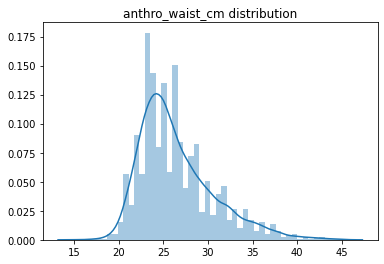

In [4]:
ML.Load_Targets(loc = target_loc,
                col_name = 'anthro_waist_cm',
                data_type = 'float',
                filter_outlier_std = (3,4),
                clear_existing = True)

ML.Show_Targets_Dist()

## Load RSI DTI data (just fiberrat, to keep # of features managable)

In [5]:
ML.Load_Data(loc = [data_loc1, data_loc2],
             inclusion_keys = ['_fiberat_'],
             filter_outlier_std = 6,
             clear_existing = True)

Cleared loaded data.

Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p102_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'dmri_rsi_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p202.txt  with dataset type: basic
dropped ['collection_id', 'mri_rsi_p202_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Keeping 294 columns per passed inclusion_keys argument
Dropped 0 cols for all missing values
Dropped 659 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Dropped 145 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...

Processing unique col values with drop threshold: 0 - warn thresho

In [6]:
ML.Show_Data_Dist()

Set to overlapping loaded subjects.
Plotting data distribution.
Viewing data with shape: (10539, 294)

Loaded data top columns by skew:


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 432x288 -pix_fmt rgba -r 2.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpnt975e7u/temp.m4v


dmri_rsinds2_fiberat_fmin    -1.985922
dmri_rsinds2_fiberat_unclh   -1.710355
dmri_rsind_fiberat_fmin      -1.681296
dmri_rsint_fiberat_fmin      -1.671180
dmri_rsind_fiberat_unclh     -1.609528
                                ...   
dmri_rsints2_fiberat_cstlh    0.692562
dmri_rsints2_fiberat_unclh    0.804596
dmri_rsin0s2_fiberat_unclh    0.804956
dmri_rsin0s2_fiberat_fmin     0.975788
dmri_rsints2_fiberat_fmin     0.976148
Length: 294, dtype: float64



## Load Family ID & Sex as strat vars

In [7]:
ML.Load_Strat(loc=strat1,
              col_name='rel_family_id')

ML.Load_Strat(loc=data_loc1,
              col_name='sex')

Loading /home/sage/work/ABCD2p0NDA/acspsw03.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 2 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Loaded Shape: (11873, 1)
Loading /home/sage/work/ABCDFixRelease2p0p1/mri_rsi_p102.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 1 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0
Loaded Shape: (11399, 1)
Merged with existing (merge=inner)
New combined shape: (11397, 2)


## Define val strat on family id

In [8]:
ML.Define_Validation_Strategy(groups='rel_family_id')

Calling Prepare_All_Data() to change the default merge behavior call it again!
Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (10537, 297)
CV defined with group preserving over 9000 unique values.


## Train Test Split

In [9]:
ML.Train_Test_Split(test_size = .2)

Performing split on 10537 subjects!
random_state: 1
Test split size: 0.2

Performed train test split
Train size: 8448
Test size:  2089


## Modelling

In [10]:
from BPt import ProblemSpec

In [11]:
spec = ProblemSpec(problem_type = 'regression',
                    scorer = ['r2', 'neg_mean_absolute_error'],
                    n_jobs = 8)

ML.Set_Default_ML_Verbosity()

Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
progress_loc: None
pipeline_verbose: False
compute_train_score: False
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
best_params_score: False
save_to_logs: False
flush: False



# Baseline w/ just linear model

In [12]:
from BPt import , Model

linear_pipeline = ()

results = ML.Evaluate(model_pipeline = linear_pipeline,
                      problem_spec = spec)

[Imputer(obj='mean', scope='float'), Imputer(obj='median', scope='cat')]
Passed default imputers, setting to: None
Model(obj='ridge')
Passed default model, setting to: None

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

model=\
Model(obj='ridge')

param_search=\
None



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.10434069491225247
Micro Std in Validation score:  0.009567765403259425
Macro Std in Validation score:  0.00023364889855115312

Scorer:  neg_mean_absolute_error
Mean Validation score:  -3.0746818705664087
Micro Std in Validation score:  0.025442853065598747
Macro Std in Validation score:  0.0006144841637096832



In [13]:
pipeline = (model = Model('ridge', params=0))

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

[Imputer(obj='mean', scope='float'), Imputer(obj='median', scope='cat')]
Passed default imputers, setting to: None

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

model=\
Model(obj='ridge')

param_search=\
None



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.10434069491225247
Micro Std in Validation score:  0.009567765403259425
Macro Std in Validation score:  0.00023364889855115312

Scorer:  neg_mean_absolute_error
Mean Validation score:  -3.0746818705664087
Micro Std in Validation score:  0.025442853065598747
Macro Std in Validation score:  0.0006144841637096832



In [14]:
from BPt import ParamSearch

# Add param search
pipeline = (model = Model('ridge', params=1))
search = ParamSearch(n_iter = 60)
pipeline.param_search = search

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

[Imputer(obj='mean', scope='float'), Imputer(obj='median', scope='cat')]
Passed default imputers, setting to: None

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60)



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.10434072664398723
Micro Std in Validation score:  0.009567768600293751
Macro Std in Validation score:  0.00023368380888988405

Scorer:  neg_mean_absolute_error
Mean Validation score:  -3.074681892825989
Micro Std in Validation score:  0.025442323874605637
Macro Std in Validation score:  0.0006147585478744055



In [15]:
ML.Plot_Global_Feat_Importances()

## Let's try sex specific versions

In [16]:
from BPt import Value_Subset

spec.subjects = Value_Subset('sex', 0)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

subjects set to:  [('sex', 0)]


--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60)



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = Value_Subset(name=sex, value=0)
len(subjects) = 5436 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.11210643196231493
Micro Std in Validation score:  0.01900257344133164
Macro Std in Validation score:  0.001652268733884056

Scorer:  neg_mean_absolute_error
Mean Validation score:  -3.1094017077631126
Micro Std in Validation score:  0.05442669400779093
Macro Std in Validation score:  0.0022465067828791874



In [17]:
spec.subjects = Value_Subset('sex', 1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

subjects set to:  [('sex', 1)]


--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60)



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = Value_Subset(name=sex, value=1)
len(subjects) = 5961 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.09990172874797079
Micro Std in Validation score:  0.010862283091985558
Macro Std in Validation score:  0.0006659971888895236

Scorer:  neg_mean_absolute_error
Mean Validation score:  -3.0320586262528977
Micro Std in Validation score:  0.04306853251251474
Macro Std in Validation score:  2.839788407404953e-05



In [18]:
# Back to all
spec.subjects = 'all'

## Scaling

Robust and Standard

In [19]:
from BPt import Scaler
pipeline.scalers = Scaler('robust')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)


--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60)



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24359045089307757
Micro Std in Validation score:  0.020918412638796496
Macro Std in Validation score:  0.001976485904387329

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.825700326439957
Micro Std in Validation score:  0.035823063790304054
Macro Std in Validation score:  6.071418710007492e-07



In [20]:


pipeline.scalers = Scaler('standard')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)


--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='standard')

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60)



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge






Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24370514397726195
Micro Std in Validation score:  0.022689100864397783
Macro Std in Validation score:  0.0026618975830611097

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.824838545054413
Micro Std in Validation score:  0.03905071232030689
Macro Std in Validation score:  0.0018786801022327992



### Let's stick with robust scaler, even though  boxcox gives boost, its a small one + increases runtime

## Try a different search_types / hyperparameter optimizers

In [21]:
pipeline.scaler = Scaler('robust')
pipeline.param_search.search_type = 'RandomSearch'

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60)



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge

Passed scaler, set as scalers





Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24359045089307757
Micro Std in Validation score:  0.020918412638796496
Macro Std in Validation score:  0.001976485904387329

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.825700326439957
Micro Std in Validation score:  0.035823063790304054
Macro Std in Validation score:  6.071418710007492e-07



In [22]:
pipeline.param_search.search_type = 'TwoPointsDE'

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60, search_type='TwoPointsDE')



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge

Passed scaler, set as scalers





Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24335190852981808
Micro Std in Validation score:  0.020806433353431866
Macro Std in Validation score:  0.001800994924690505

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.8261675903129255
Micro Std in Validation score:  0.03548414200654894
Macro Std in Validation score:  0.00042240277698035733



## We can try some other models as well

### Elastic net with param search

In [23]:
pipeline.model = Model('elastic net', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

model=\
Model(obj='elastic net', params=1)

param_search=\
ParamSearch(n_iter=60, search_type='TwoPointsDE')



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = elastic net

Passed scaler, set as scalers


/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30153.404296875, tolerance: 9.810266494750977
  positive)
/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34269.6875, tolerance: 9.898183822631836
  positive)
/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27220.0546875, tolerance: 9.765241622924805
  positive)
/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might w




Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.2585910422037737
Micro Std in Validation score:  0.02078193515919112
Macro Std in Validation score:  0.0011400324121203231

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.7935106948060784
Micro Std in Validation score:  0.036335117490630814
Macro Std in Validation score:  0.00017098660678271926



/home/sage/anaconda3/envs/home/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14359.9423828125, tolerance: 9.79932975769043
  positive)


### Light gradient boosting machine with param search

In [24]:
pipeline.model = Model('light gbm', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

model=\
Model(obj='light gbm', params=1)

param_search=\
ParamSearch(n_iter=60, search_type='TwoPointsDE')



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = light gbm

Passed scaler, set as scalers





Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.1561868687409133
Micro Std in Validation score:  0.014711513334381834
Macro Std in Validation score:  0.004472608139323195

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.9833591546165823
Micro Std in Validation score:  0.04224968877167958
Macro Std in Validation score:  0.004931855521922657



### Non-linear svm (w/ rbf kernel) param search

In [25]:
pipeline.model = Model('svm', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

model=\
Model(obj='svm', params=1)

param_search=\
ParamSearch(n_iter=60, search_type='TwoPointsDE')



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = svm

Passed scaler, set as scalers





Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.24917725192957813
Micro Std in Validation score:  0.01639402588879073
Macro Std in Validation score:  0.004312113759057212

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.773079896827457
Micro Std in Validation score:  0.0341184255492001
Macro Std in Validation score:  0.003836877980949227



### Non-linear svm (w/ rbf kernel) param search + all features treated as hyperparams

In [26]:
from BPt import Feat_Selector

pipeline.feat_selectors = Feat_Selector('selector', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

feat_selectors=\
Feat_Selector(obj='selector', params=1)

model=\
Model(obj='svm', params=1)

param_search=\
ParamSearch(n_iter=60, search_type='TwoPointsDE')



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = svm

Passed scaler, set as scalers





Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.20382263842441595
Micro Std in Validation score:  0.02136361332395393
Macro Std in Validation score:  0.0037475820559737943

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.856696969481802
Micro Std in Validation score:  0.04576367113114423
Macro Std in Validation score:  0.008311560065156653



### Same thing but w/ ridge regression

In [27]:
pipeline.model = Model('ridge', params=1)

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

feat_selectors=\
Feat_Selector(obj='selector', params=1)

model=\
Model(obj='ridge', params=1)

param_search=\
ParamSearch(n_iter=60, search_type='TwoPointsDE')



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = ridge

Passed scaler, set as scalers





Validation Scores
_________________
Scorer:  r2
Mean Validation score:  0.20639140949202908
Micro Std in Validation score:  0.01786399665131367
Macro Std in Validation score:  0.0005649571110191154

Scorer:  neg_mean_absolute_error
Mean Validation score:  -2.9024997014069465
Micro Std in Validation score:  0.043930733762452726
Macro Std in Validation score:  0.00011069046856770903



### MLP ?

In [30]:
pipeline.feat_selectors = None
pipeline.model = Model('mlp', params=1)

search = ParamSearch('TwoPointsDE', n_iter=100)
pipeline.param_search = search

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)

Passed scaler, set as scalers

--------------
imputers=\
[Imputer(obj='mean', scope='float'),
 Imputer(obj='median', scope='cat')]

scalers=\
Scaler(obj='robust')

model=\
Model(obj='mlp', params=1)

param_search=\
ParamSearch(n_iter=100, search_type='TwoPointsDE')



ProblemSpec
------------
problem_type = regression
target = anthro_waist_cm
scorer = ['r2', 'neg_mean_absolute_error']
weight_scorer = False
scope = all
subjects = all
len(subjects) = 10537 (before overlap w/ train/test subjects)
n_jobs = 8
random_state = 1

Evaluate Params
---------------
splits = 3
n_repeats = 2
cv = default
train_subjects = train
feat_importances = None
len(train_subjects) = 8448 (before overlap w/ problem_spec.subjects)
run_name = mlp

Passed scaler, set as scalers


KeyboardInterrupt: 

### SGD Elastic Net?

In [ ]:
pipeline.model = Model('sgd', params=1)
pipeline.scaler = Scaler('robust')

results = ML.Evaluate(model_pipeline = pipeline,
                      problem_spec = spec)